1. Take $$I_1 = \int_{-10}^{10} \dfrac{dx}{1 + x^2}$$ Plot the error as h varies, when integrating using the following rules:
    * Trapezoidal Rule
    * Simpson's $\frac{1}{3}$ Rule
    * Romberg Rule

2. Calculate $$I_2 = \int_{-1}^{1} \sqrt{1 - x^2} dx$$ using the Romberg integration method.

In [2]:
# Imports and auxiliary functions
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi
from scipy.integrate import quad

val_1 = 2 * np.arctan(10)
val_2 = pi/2

def f_1(x):
    return(np.divide(1, 1 + np.power(x, 2)))

def f_2(x):
    return(np.sqrt(1 - np.power(x, 2)))

In [3]:
### Trapezoidal Rule Function
def trapezoidal(points, h, f): # function to calculate integral between (a, b)
                           # using Composite Trapezoidal rule with n points
                           # in between a and b
    value = h * ( 0.5 * ( f(points[0]) + f(points[-1]) ) + np.sum( f(points[1:-1]) ) )
    return value

In [4]:
### Simpson's 1/3 Rule Function
def simpsons13(points, h, f): # function to calculate integral between (a, b)
                          # using Simpson's one-third Rule with n points
                          # in between a and b. Note that n-1 must be even.
    value = h/3 * ( f(points[0]) + f(points[-1]) + 4 * np.sum( f(points[1:-1:2]) ) + 2 * np.sum( f(points[2:-1:2])) )
    return value

In [5]:
### Romberg Rule Function
def romberg(I_old, a, b, numpoints, f, retstep=False, N=10): # function to calculate integral between (a, b)
                               # using Romberg's Rule
    I_new = np.zeros(N)
    h = np.zeros(N)
    for i in range(N):
        points, h[i] = np.linspace(a, b, 2**(i+1) * numpoints, retstep=True)
        p = trapezoidal(points, h[i], f)
        q = I_old
        I_new[i] = p + (p - q)/(3)
        I_old = I_new[i]
    if(retstep == True):
        return I_new, h
    else:
        return I_new[-1]

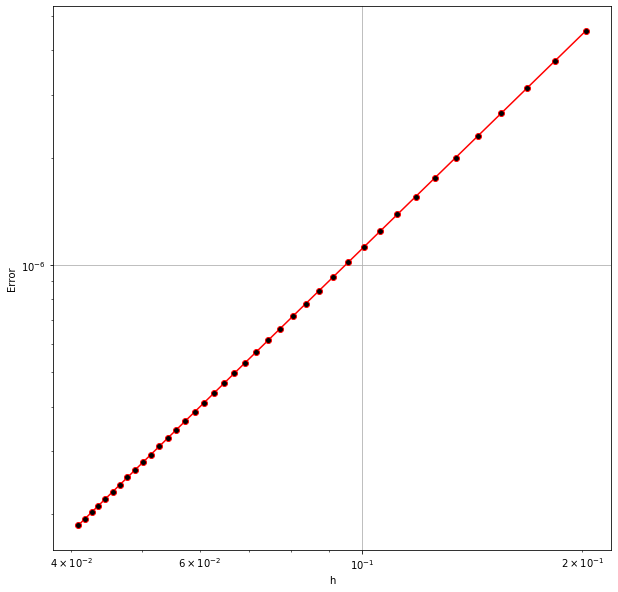

In [6]:
### Main Block - Trapezoidal Rule


numpoints = np.arange(100, 500, 10, dtype=int)
h = np.zeros_like(numpoints, dtype=float)
values = np.zeros_like(numpoints, dtype=float)
for i in range(np.size(numpoints)):
    points, h[i] = np.linspace(-10, 10, numpoints[i], retstep=True)
    values[i] = trapezoidal(points, h[i], f_1)
errors = (val_1 - values)/val_1

fig = plt.figure()
fig.set_size_inches(10, 10)
plt.loglog(h, errors, 'ro-', mfc='k')
#plt.loglog(h, 0.0001 * h**2)
plt.xlabel('h')
plt.ylabel('Error')
plt.grid(True)

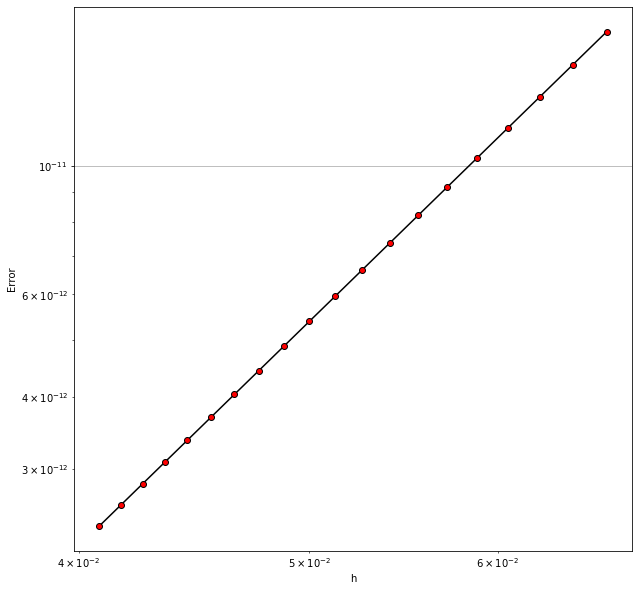

In [7]:
### Main Block - Simpsons Rule


numpoints = np.arange(301,501,10, dtype=int)
h = np.zeros_like(numpoints, dtype=float)
values = np.zeros_like(numpoints, dtype=float)
for i in range(np.size(numpoints)):
    points, h[i] = np.linspace(-10, 10, numpoints[i], retstep=True)
    values[i] = simpsons13(points, h[i], f_1)
errors = (val_1 - values)/val_1

fig = plt.figure()
fig.set_size_inches(10, 10)
plt.loglog(h, abs(errors), 'ko-', mfc='r')
#plt.loglog(h, 0.000001 * h ** 4)
plt.xlabel('h')
plt.ylabel('Error')
plt.grid(True)

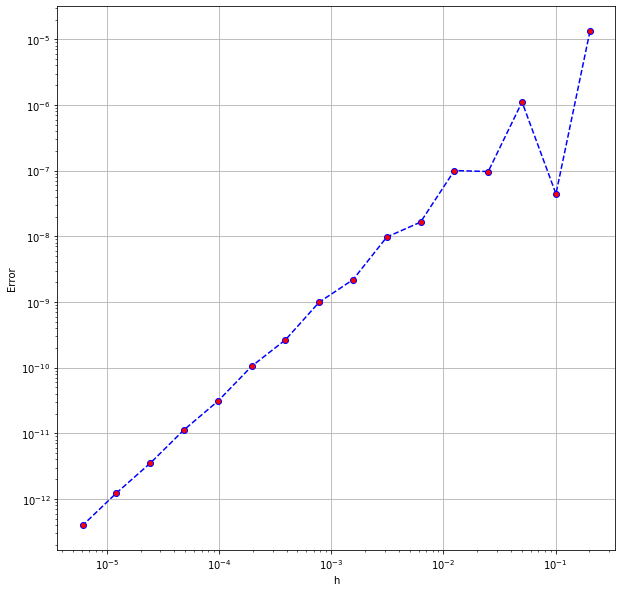

In [8]:
### Main Block - Romberg Rule

x, h = np.linspace(-10, 10, 100, retstep=True)
I_old = trapezoidal(x, h, f_1)
a = x[0]
b = x[-1]
numpoints = np.size(x)
I, spacing = romberg(I_old, a, b, numpoints, f_1, True, 15)
I = np.hstack((I_old, I))
spacing = np.hstack((h, spacing))
errors = val_1 - I

fig = plt.figure()
fig.set_size_inches(10, 10)
plt.loglog(spacing, abs(errors), 'bo--', mfc='r')
plt.xlabel('h')
plt.ylabel('Error')
plt.grid(True)

---

In [9]:
### Calculation of I_2

points, h = np.linspace(-1, 1, 1000, retstep=True)
val = trapezoidal(points, h, f_2)
I_2, h = romberg(val, -1, 1, 100, f_2, True)

In [10]:
I_2

array([1.57002422, 1.57077551, 1.57070509, 1.57079206, 1.57078549,
       1.57079561, 1.57079504, 1.57079622, 1.57079617, 1.57079631])

In [11]:
h

array([1.00502513e-02, 5.01253133e-03, 2.50312891e-03, 1.25078174e-03,
       6.25195374e-04, 3.12548836e-04, 1.56262208e-04, 7.81280519e-05,
       3.90632630e-05, 1.95314407e-05])

In [12]:
val_2 - I_2[-1]

1.6206228581339133e-08